In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
liver = pd.read_csv('../input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv')

- The liver has a significant role in metabolism, regulation of red blood cells (RBCs) and glucose synthesis and storage. 
- The liver function tests typically include alanine transaminase (ALT) and aspartate transaminase (AST), alkaline phosphatase (ALP), gamma-glutamyl transferase (GGT), serum bilirubin, prothrombin time (PT), the international normalized ratio (INR) and albumin. 
- These tests can be helpful in determining an area of the liver where damage may be taking place and depending on the pattern of elevation can help organize a differential diagnosis. 
- Elevations in ALT and AST in disproportion to elevations in alkaline phosphatase and bilirubin denotes a hepatocellular disease. 
- Whereas, an elevation in alkaline phosphatase and bilirubin in disproportion to ALT and AST would denote a cholestatic pattern. 
- The actual function of the liver can be graded based on its ability to produce albumin as well as vitamin K dependent clotting factors.
- indirect bilirubin = unconjugated, direct = conjugated,  

#### Quick look at data structure

In [4]:
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# rename cols to something more medically conventional
liver.rename(columns={"sgpt": "ALT", "sgot": "AST", "alkphos": "ALP"}, inplace=True)

liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,ALT,AST,ALP,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   ALT               583 non-null    float64
 8   AST               583 non-null    float64
 9   ALP               579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
# check categorical 
liver['gender'].value_counts()

Male      441
Female    142
Name: gender, dtype: int64

In [8]:
# check numerical
liver.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,ALT,AST,ALP,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tot_bilirubin'}>,
        <AxesSubplot:title={'center':'direct_bilirubin'}>],
       [<AxesSubplot:title={'center':'tot_proteins'}>,
        <AxesSubplot:title={'center':'albumin'}>,
        <AxesSubplot:title={'center':'ag_ratio'}>],
       [<AxesSubplot:title={'center':'ALT'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'ALP'}>],
       [<AxesSubplot:title={'center':'is_patient'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

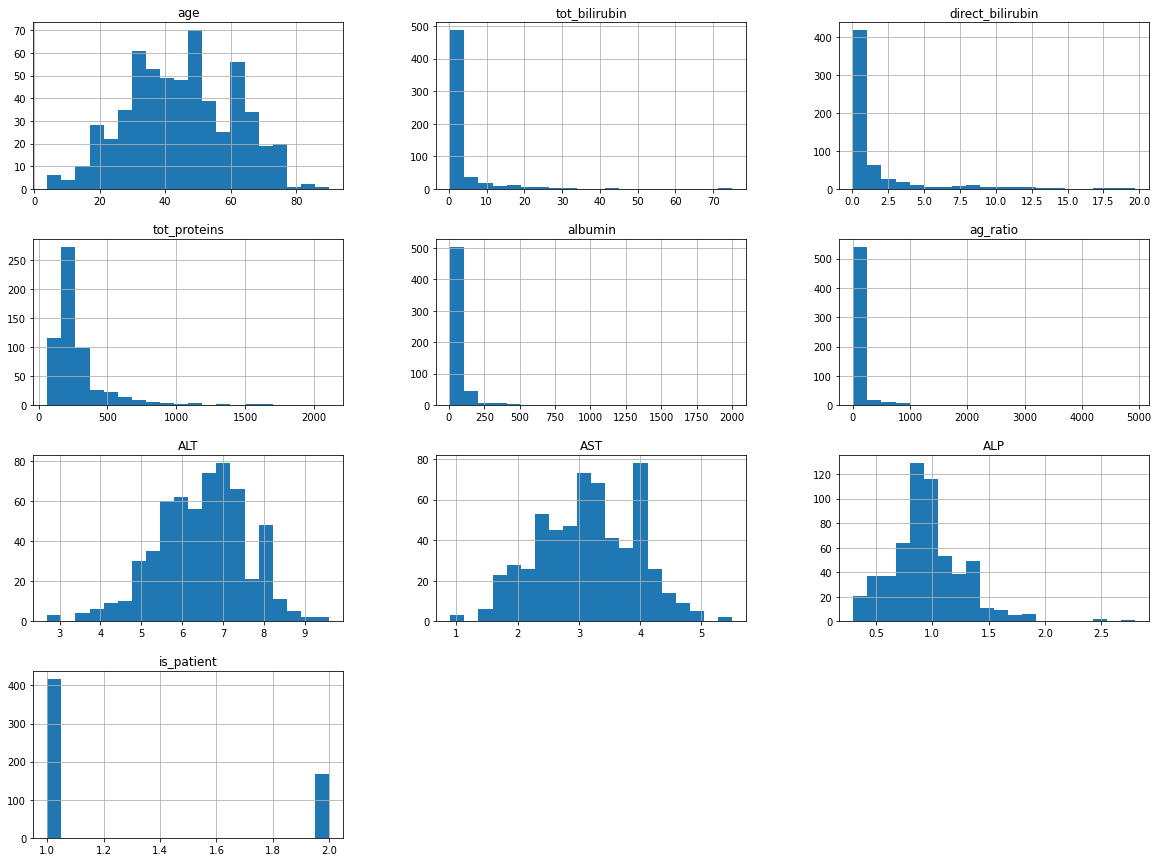

In [9]:
liver.hist(bins=20,figsize=(20,15))

#### Create a test set

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(liver, test_size = 20,random_state=1)

In [11]:
liver = train_set.copy()

#### Look for correlations

In [12]:
corr_matrix = liver.corr()
corr_matrix['is_patient'].sort_values(ascending=False)

is_patient          1.000000
ALP                 0.150836
AST                 0.148313
ALT                 0.025404
age                -0.130329
ag_ratio           -0.152201
albumin            -0.165261
tot_proteins       -0.184252
tot_bilirubin      -0.219699
direct_bilirubin   -0.245601
Name: is_patient, dtype: float64

<AxesSubplot:>

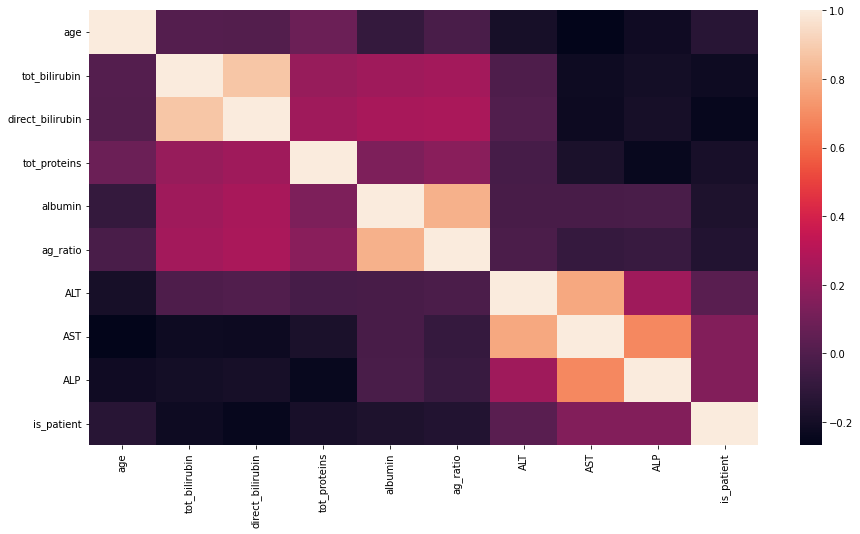

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap ='rocket')

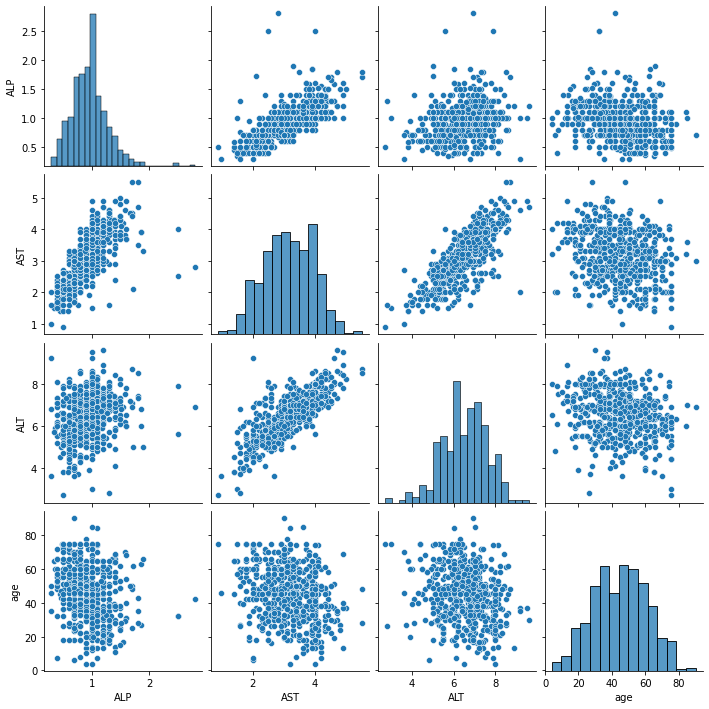

In [14]:
# check most promising correlations
attributes = ['ALP', 'AST', 'ALT', 'age']
sns.pairplot(liver[attributes])

#### Experimenting with Attribute Combinations:

In [15]:
# indirect_bilirubin = tot - direct
# hepatocellular disease = alt + ast / alkphos + tot_bili
# cholestatic pattern = alkphos + tot_bili / alt + ast     

liver['indirect_bilirubin'] = liver['tot_bilirubin'] - liver['direct_bilirubin']
liver['alt_ast_to_alp_ratio'] = liver['ALT'] + liver['AST'] / liver['ALP']
liver ['alp_to_ast_alt_ratio'] = liver['ALP'] / liver['ALT'] + liver['AST']

In [16]:
corr_matrix= liver.corr()
corr_matrix['is_patient'].sort_values(ascending=False)

is_patient              1.000000
alp_to_ast_alt_ratio    0.151659
ALP                     0.150836
AST                     0.148313
ALT                     0.025404
alt_ast_to_alp_ratio   -0.039302
age                    -0.130329
ag_ratio               -0.152201
albumin                -0.165261
indirect_bilirubin     -0.168670
tot_proteins           -0.184252
tot_bilirubin          -0.219699
direct_bilirubin       -0.245601
Name: is_patient, dtype: float64

<AxesSubplot:>

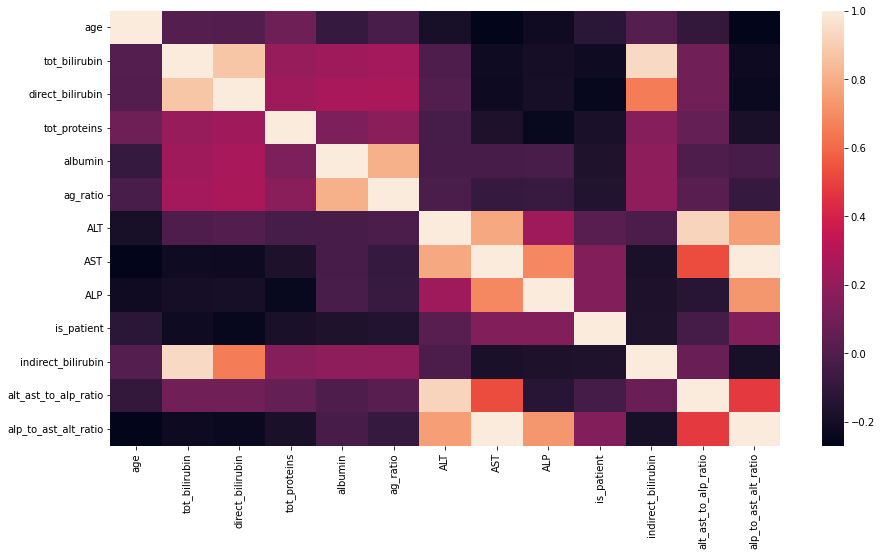

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap ='rocket')

## Data Preparation

In [18]:
# revert to clean training set, seperate predictors and target values
liver = train_set.drop('is_patient', axis = 1)
liver_labels = train_set['is_patient'].copy()

In [19]:
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,ALT,AST,ALP
439,42,Female,0.8,0.2,168,25,18,6.2,3.1,1.00
306,48,Male,1.6,1.0,588,74,113,7.3,2.4,0.40
412,65,Male,4.9,2.7,190,33,71,7.1,2.9,0.70
132,18,Female,0.8,0.2,199,34,31,6.5,3.5,1.16
90,60,Male,5.7,2.8,214,412,850,7.3,3.2,0.78


In [20]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 439 to 37
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               563 non-null    int64  
 1   gender            563 non-null    object 
 2   tot_bilirubin     563 non-null    float64
 3   direct_bilirubin  563 non-null    float64
 4   tot_proteins      563 non-null    int64  
 5   albumin           563 non-null    int64  
 6   ag_ratio          563 non-null    int64  
 7   ALT               563 non-null    float64
 8   AST               563 non-null    float64
 9   ALP               559 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 64.5+ KB


In [21]:
# get categorical and numerical columns
liver_num = liver.drop("gender", axis=1)
liver_cat = liver[['gender']]

In [22]:
liver_num = liver_num.astype(float)

In [23]:
liver_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 439 to 37
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               563 non-null    float64
 1   tot_bilirubin     563 non-null    float64
 2   direct_bilirubin  563 non-null    float64
 3   tot_proteins      563 non-null    float64
 4   albumin           563 non-null    float64
 5   ag_ratio          563 non-null    float64
 6   ALT               563 non-null    float64
 7   AST               563 non-null    float64
 8   ALP               559 non-null    float64
dtypes: float64(9)
memory usage: 60.1 KB


In [24]:
# Custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "tot_bilirubin", "direct_bilirubin", "ALT", "AST", "ALP"
tot_bilirubin_ix, direct_bilirubin_ix, ALT_ix, AST_ix, ALP_ix = [
    liver_num.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_indirect_bilirubin=True): # no *args or **kargs
        self.add_indirect_bilirubin = add_indirect_bilirubin
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X): 
        alt_ast_to_alp_ratio = X[:, ALT_ix] + X[:, AST_ix] / X[:, ALP_ix]
        alp_to_ast_alt_ratio = X[:, ALP_ix] / X[:, ALT_ix] + X[:, AST_ix]
        if self.add_indirect_bilirubin:
            indirect_bilirubin = X[:, tot_bilirubin_ix] - X[:, direct_bilirubin_ix]
            return np.c_[X, indirect_bilirubin, alt_ast_to_alp_ratio, alp_to_ast_alt_ratio]
        else:
            return np.c_[X, alt_ast_to_alp_ratio, alp_to_ast_alt_ratio]

attr_adder = CombinedAttributesAdder(add_indirect_bilirubin=False) # hyperparameter, set to True to add_indirect_bilirubin col 
liver_extra_attribs = attr_adder.transform(liver.values)


In [25]:
# Transformation Pipelines

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
#     ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

liver_num_tr = num_pipeline.fit_transform(liver_num)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(liver_num)
cat_attribs = ['gender']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

liver_prepared = full_pipeline.fit_transform(liver)

## Training and Evaluating Classification Models

In [27]:
# split training set for model evaluation (DO NOT USE TEST_SET YET!)
X_train, X_test, y_train, y_test = train_test_split(liver_prepared, liver_labels, test_size=0.20, random_state=1)

#### Decision Tree Classifier

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f"Acurracy: {accuracy_score(y_test, y_pred)}\n")

scores = cross_val_score(dt, liver_prepared, liver_labels, cv=10)

print(f"CV scores:\n {scores}\n")
print(f"CV mean: {scores.mean()} accuracy with a standard deviation of { scores.std()}\n") 

# ROC AUC score
# Compute the probabilities of obtaining the positive class
y_pred_proba = dt.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
dt_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {dt_clf_roc_auc_score}')

Acurracy: 0.672566371681416

CV scores:
 [0.59649123 0.66666667 0.68421053 0.69642857 0.66071429 0.66071429
 0.76785714 0.625      0.66071429 0.64285714]

CV mean: 0.6661654135338346 accuracy with a standard deviation of 0.043317949103613515

ROC AUC score: 0.5729166666666666


#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f"Acurracy: {accuracy_score(y_test, y_pred)}\n")

scores = cross_val_score(log_reg, liver_prepared, liver_labels, cv=10)
print(f"CV scores:\n {scores}\n")
print(f"CV mean: {scores.mean()} accuracy with a standard deviation of { scores.std()}\n") 

# ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
log_reg_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {log_reg_clf_roc_auc_score}')

Acurracy: 0.7168141592920354

CV scores:
 [0.71929825 0.71929825 0.70175439 0.73214286 0.73214286 0.75
 0.71428571 0.69642857 0.69642857 0.75      ]

CV mean: 0.7211779448621554 accuracy with a standard deviation of 0.018864748392637343

ROC AUC score: 0.7545454545454546


#### K-Neighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Acurracy: {accuracy_score(y_test, y_pred)}\n")

scores = cross_val_score(knn, liver_prepared, liver_labels, cv=10)
print(f"CV scores:\n {scores}\n")
print(f"CV mean: {scores.mean()} accuracy with a standard deviation of { scores.std()}\n") 

# ROC AUC score
y_pred_proba = knn.predict_proba(X_test)[:,1]
knn_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {knn_clf_roc_auc_score}')

Acurracy: 0.6460176991150443

CV scores:
 [0.57894737 0.63157895 0.64912281 0.67857143 0.67857143 0.76785714
 0.64285714 0.58928571 0.66071429 0.69642857]

CV mean: 0.6573934837092732 accuracy with a standard deviation of 0.051354218262166726

ROC AUC score: 0.6725378787878789


#### Ensemble: Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', log_reg),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set    
    clf.fit(X_train, y_train)
    # Predict the labels of the test set   
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(f"\nVoting Classifier acurracy: {accuracy_score(y_test, y_pred)}\n")

Logistic Regression : 0.717
K Nearest Neighbours : 0.646
Classification Tree : 0.673

Voting Classifier acurracy: 0.672566371681416



#### Ensemble: Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

bc = BaggingClassifier(base_estimator= dt, random_state=1)
bc.fit(X_train, y_train)   
y_pred = bc.predict(X_test)

print(f"\nBagging Classifier acurracy for Decision tree: {accuracy_score(y_test, y_pred)}\n")

# ROC AUC score
y_pred_proba = bc.predict_proba(X_test)[:,1]
bc_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {bc_clf_roc_auc_score}')


Bagging Classifier acurracy for Decision tree: 0.7168141592920354

ROC AUC score: 0.6996212121212121


#### Ensemble: Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)   
y_pred = rf.predict(X_test)

print(f"\nRandom Forest Classifier acurracy for Decision tree: {accuracy_score(y_test, y_pred)}\n")

# ROC AUC score
y_pred_proba = rf.predict_proba(X_test)[:,1]
rf_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {rf_clf_roc_auc_score}')


Random Forest Classifier acurracy for Decision tree: 0.7168141592920354

ROC AUC score: 0.7367424242424243


#### Ensemble: AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

ada = AdaBoostClassifier(base_estimator=dt, random_state=1)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print(f"\nAdaBoost acurracy for Decision tree: {accuracy_score(y_test, y_pred)}\n")

# ROC AUC score
y_pred_proba = ada.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {adb_clf_roc_auc_score}')


AdaBoost acurracy for Decision tree: 0.6814159292035398

ROC AUC score: 0.6058712121212121


#### Ensemble: Gradient Boost

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbt = GradientBoostingClassifier(random_state=1)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)

print(f"\nGradient Boost acurracy for Decision tree: {accuracy_score(y_test, y_pred)}\n")

# ROC AUC score
y_pred_proba = gbt.predict_proba(X_test)[:,1]
gb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {gb_clf_roc_auc_score}')


Gradient Boost acurracy for Decision tree: 0.6637168141592921

ROC AUC score: 0.7420454545454545


#### Ensemble: Stochastic Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

sgbt = GradientBoostingClassifier(subsample=0.7, random_state=1)
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)

print(f"\nStochastic Gradient Boost acurracy for Decision tree: {accuracy_score(y_test, y_pred)}\n")

# ROC AUC score
y_pred_proba = sgbt.predict_proba(X_test)[:,1]
sgb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score: {sgb_clf_roc_auc_score}')


Stochastic Gradient Boost acurracy for Decision tree: 0.6637168141592921

ROC AUC score: 0.7715909090909091


### Tuning hyperparameters

##### Inspecting Decision Tree hyperparameters

In [37]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

##### Decision Tree GridSearch cross validation 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params_dt = {
    'max_depth':[2, 3, 4, 5, 6],
    'max_features': [0.1, 0.2, 0.4, 0.6],
    'min_samples_leaf':[0.02, 0.04, 0.06, 0.08]
}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)
grid_dt.fit(liver_prepared, liver_labels)

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# extract best hyperparameters
print(f"Best hyperparameters: {grid_dt.best_params_}\n")
print(f"Best CV accuracy: {grid_dt.best_score_}\n")
print(f"Best model: {grid_dt.best_estimator_}\n")
print(f"ROC AUC score: {test_roc_auc}")

Best hyperparameters: {'max_depth': 3, 'max_features': 0.1, 'min_samples_leaf': 0.02}

Best CV accuracy: 0.7176065162907268

Best model: DecisionTreeClassifier(max_depth=3, max_features=0.1, min_samples_leaf=0.02,
                       random_state=1)

ROC AUC score: 0.7496212121212121


##### Decision Tree Randomised Search cross validation

In [39]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

params_dt = {
    'max_depth': np.arange(1,11,1),
    'max_features':np.arange(0.1,1,0.1),
    'min_samples_leaf':np.arange(0.01,0.1,0.01)
}

rand_dt = RandomizedSearchCV(estimator=dt,param_distributions= params_dt, scoring='accuracy', cv=10, n_jobs=-1)
rand_dt.fit(liver_prepared, liver_labels)

# Predict the test set probabilities of the positive class
y_pred_proba = rand_dt.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# extract best hyperparameters
print(f"Best hyperparameters: {rand_dt.best_params_}\n")
print(f"Best CV accuracy: {rand_dt.best_score_}\n")
print(f"Best model: {rand_dt.best_estimator_}")
print(f"ROC AUC score: {test_roc_auc}")

Best hyperparameters: {'min_samples_leaf': 0.06999999999999999, 'max_features': 0.8, 'max_depth': 3}

Best CV accuracy: 0.7140977443609022

Best model: DecisionTreeClassifier(max_depth=3, max_features=0.8,
                       min_samples_leaf=0.06999999999999999, random_state=1)
ROC AUC score: 0.7346590909090909


##### Inspecting Random forest hyperparameters

In [40]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

##### Random forest GridSearch cross validation 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth':[2, 4, 6, 8],
    'max_features': ['auto', 'log2', 'sqrt'],
    'min_samples_leaf':[0.1, 0.2, 0.3]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='accuracy', cv=10, n_jobs=-1)
grid_rf.fit(liver_prepared, liver_labels)

# Predict the test set probabilities of the positive class
y_pred_proba = grid_rf.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# extract best hyperparameters
print(f"Best hyperparameters: {grid_rf.best_params_}\n")
print(f"Best CV accuracy: {grid_rf.best_score_}\n")
print(f"Best model: {grid_rf.best_estimator_}\n")
print(f"ROC AUC score: {test_roc_auc}")

Best hyperparameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 0.1, 'n_estimators': 100}

Best CV accuracy: 0.7105263157894737

Best model: RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, random_state=1)

ROC AUC score: 0.7625


##### Inspecting Logistic regression hyperparameters

In [42]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Logistic regression GridSearch cross validation

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params_log_reg = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter':[100, 150, 200]
}

grid_log_reg = GridSearchCV(estimator=log_reg, param_grid=params_log_reg, scoring='accuracy', cv=10, n_jobs=-1)
grid_log_reg.fit(liver_prepared, liver_labels)

# Predict the test set probabilities of the positive class
y_pred_proba = grid_log_reg.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# extract best hyperparameters
print(f"Best hyperparameters: {grid_log_reg.best_params_}\n")
print(f"Best CV accuracy: {grid_log_reg.best_score_}\n")
print(f"Best model: {grid_log_reg.best_estimator_}\n")
print(f"ROC AUC score: {test_roc_auc}")

Best hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Best CV accuracy: 0.7211779448621554

Best model: LogisticRegression(random_state=1, solver='newton-cg')

ROC AUC score: 0.7757575757575758


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

#### Prepare test set

In [44]:
test_set.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,ALT,AST,ALP,is_patient
255,38,Male,1.7,0.7,859,89,48,6.0,3.0,1.00,1
323,12,Male,0.8,0.2,302,47,67,6.7,3.5,1.10,2
65,57,Male,1.4,0.7,470,62,88,5.6,2.5,0.80,1
111,48,Male,3.2,1.6,257,33,116,5.7,2.2,0.62,1
268,40,Male,14.5,6.4,358,50,75,5.7,2.1,0.50,1


In [45]:
liver_X_test = test_set.drop('is_patient', axis = 1)
liver_y_test = test_set['is_patient'].copy()

liver_test_prepared = full_pipeline.fit_transform(liver_X_test)

#### Evaluating test set

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

dt = grid_dt.best_estimator_
dt.fit(liver_prepared, liver_labels)

y_pred = dt.predict(liver_test_prepared)
test_accuracy = accuracy_score(liver_y_test, y_pred)

# Predict the test set probabilities of the positive class
y_pred_proba = dt.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {test_accuracy}")
print(f"ROC AUC score: {test_roc_auc}")

Accuracy: 0.9
ROC AUC score: 0.7496212121212121


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

rf = grid_rf.best_estimator_
rf.fit(liver_prepared, liver_labels)

y_pred = rf.predict(liver_test_prepared)
test_accuracy = accuracy_score(liver_y_test, y_pred)

# Predict the test set probabilities of the positive class
y_pred_proba = rf.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {test_accuracy}")
print(f"ROC AUC score: {test_roc_auc}")

Accuracy: 0.8
ROC AUC score: 0.7625


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

lr = grid_log_reg.best_estimator_
lr.fit(liver_prepared, liver_labels)

y_pred = lr.predict(liver_test_prepared)
test_accuracy = accuracy_score(liver_y_test, y_pred)

# Predict the test set probabilities of the positive class
y_pred_proba = lr.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {test_accuracy}")
print(f"ROC AUC score: {test_roc_auc}")
print(matrix)

Accuracy: 0.9
ROC AUC score: 0.7757575757575758


NameError: name 'matrix' is not defined